## Statistics - 3 (Sampling)
- Sampling is the process of selecting a subset of data (sample) from a larger population so that we can analyze it and make conclusions about the whole.
- Why we sample:
    - Saves time and cost
    - Easier to collect and process
    - Useful when population data is too large or infinite
- Example: Instead of surveying all 10 lakh voters, we pick a representative sample of 2,000 people.
- TERMS
    - Population - Entire dataset (e.g., all customers)
    - Sample- Subset drawn from population
    - Sampling Frame- List from which the sample is drawn
    - Sampling Error- Difference between population and sample estimate
- Types of Sampling
    - Probability : Every element has a known, non-zero chance of being selected.
        -   Simple Random Sampling : Each item equally likely, random.sample(population, k)
        -   Systematic Sampling : Every kᵗʰ item is picked , Use slicing or np.arange()
        -    Stratified Sampling: Divide population into groups (strata) and sample within each, Use groupby() in pandas
        -    Cluster Sampling : Divide into clusters, randomly select clusters; Use random choice on groups
    - Non-Probability Sampling : Selection depends on researcher judgment or convenience.
        - Convenience Sampling : Choose whoever is easiest to access
        -  Purposive / Judgmental : Choose based on expertise / purpose
        -  Snowball Sampling : Existing subjects recruit future ones
        -  Quota Sampling : Select until quota met for categories

### Simple Random Sampling

In [2]:
import random

population = list(range(1, 101))  # 1 to 100
print(population)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [ ]:
sample = random.sample(population, 10)  # pick 10 random items
print(sample)

In [3]:
import numpy as np
data = np.arange(1, 101)
print(data)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]


In [4]:
sample = np.random.choice(data, size=10, replace=False)
print(sample)

[ 91  93  48  58  13  26  36  24 100  85]


- replace=False → sampling without replacement
- replace=True → sampling with replacement

In [5]:
# Pandas

In [6]:
import pandas as pd

df = pd.DataFrame({
    'id': range(1, 21),
    'age': np.random.randint(18, 60, 20)
})
df

,id,age
0,1,25
1,2,57
2,3,41
3,4,49
4,5,31
5,6,36
6,7,22
7,8,48
8,9,52
9,10,28


In [7]:
# Simple random sample of 5 rows
sample_df = df.sample(n=5, random_state=42)
print(sample_df)

    id  age
0    1   25
17  18   44
15  16   18
1    2   57
8    9   52


### Stratified Sampling (by group)

In [9]:
# Sample 30% from each group
stratified_sample = df.groupby('age').sample(frac=0.3, random_state=1)

In [10]:
stratified_sample

,id,age
4,5,31
7,8,48
19,20,57


### Systematic Sampling

In [11]:
k = 5
sys_sample = df.iloc[::k]
print(sys_sample)

    id  age
0    1   25
5    6   36
10  11   55
15  16   18


### Central Limit Theoram (CLT)
- sampling from a population leads to the sampling distribution of the mean, illustrating the Central Limit Theorem (CLT).

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Step 1: Create a non-normal (skewed) population
np.random.seed(42)
population = np.random.exponential(scale=10, size=100000)  # highly skewed data

In [15]:
# Step 2: Take repeated random samples & compute their means
sample_size = 30
num_samples = 1000
sample_means = [np.mean(np.random.choice(population, sample_size)) for _ in range(num_samples)]

In [17]:
print(population)

[ 4.6926809  30.10121431 13.16745694 ... 11.22249686  6.92042281
  4.94146309]


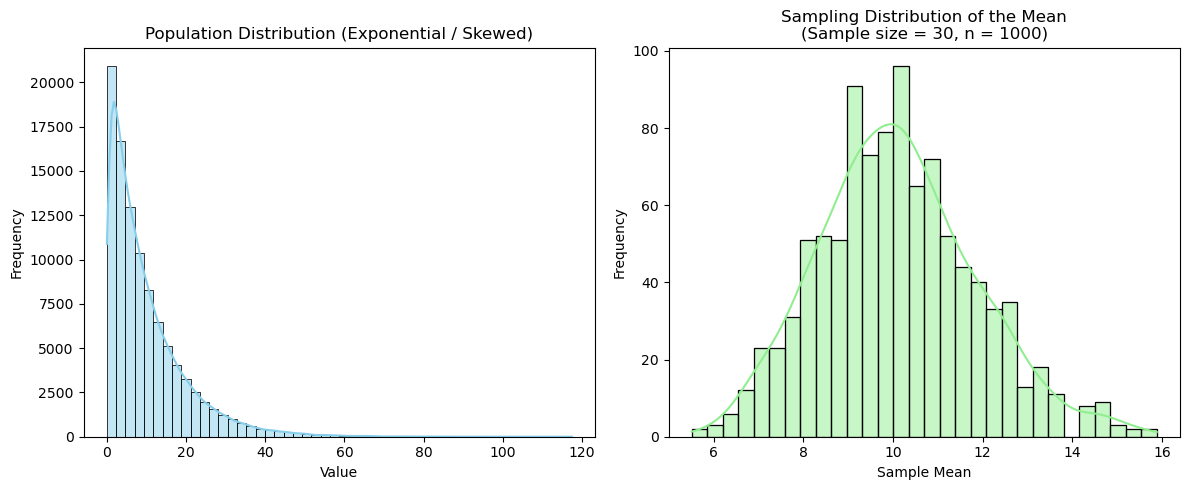

In [16]:
# Step 3: Plot population vs sample means
plt.figure(figsize=(12,5))

# Population distribution
plt.subplot(1, 2, 1)
sns.histplot(population, bins=50, kde=True, color='skyblue')
plt.title("Population Distribution (Exponential / Skewed)")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Sampling distribution of the mean
plt.subplot(1, 2, 2)
sns.histplot(sample_means, bins=30, kde=True, color='lightgreen')
plt.title(f"Sampling Distribution of the Mean\n(Sample size = {sample_size}, n = {num_samples})")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

- Left plot → The original population (skewed to the right).
- Right plot → The distribution of sample means (looks bell-shaped / Normal).
🎯 This is the Central Limit Theorem in action:
- No matter the shape of the population, the distribution of sample means tends toward Normal as the sample size increases.

## End of File